In [1]:
import warnings
import matplotlib.pyplot as plt
import ngflowboost as ngbf
import numpy as np
import torch

warnings.filterwarnings('ignore')

In [2]:
def _generate_data(n=100, std=0.1):
    eps = std * np.random.randn(n)
    x = np.random.rand(n) * 2*np.pi
    y = np.sin(x) + eps
    return x, y


def generate_data(n=100, std=0.1):
    x1, y1 = _generate_data(n=n, std=std)
    x2, y2 = _generate_data(n=n, std=std)
    y2 = -y2
    return np.concatenate([x1, x2]).reshape(-1, 1), np.concatenate([y1, y2])

In [3]:
x, y = generate_data(std=0.01)

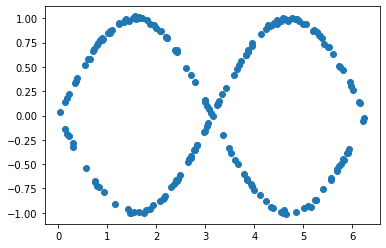

In [4]:
plt.scatter(x, y)
plt.show()

In [5]:
model = ngbf.NGBoost(n_estimators=1000, verbose_eval=25)

In [6]:
model.fit(x, y)

[iter 0] loss=7.0615 val_loss=0.0000 scale=0.5000 norm=0.0080
[iter 25] loss=1.3868 val_loss=0.0000 scale=64.0000 norm=0.1433
[iter 50] loss=1.0657 val_loss=0.0000 scale=128.0000 norm=0.2931
[iter 75] loss=0.9423 val_loss=0.0000 scale=256.0000 norm=0.5837
[iter 100] loss=0.8150 val_loss=0.0000 scale=128.0000 norm=0.3036
[iter 125] loss=0.8432 val_loss=0.0000 scale=128.0000 norm=0.2959
[iter 150] loss=0.8405 val_loss=0.0000 scale=128.0000 norm=0.3041
[iter 175] loss=0.8200 val_loss=0.0000 scale=128.0000 norm=0.3166
[iter 200] loss=0.7849 val_loss=0.0000 scale=128.0000 norm=0.3152
[iter 225] loss=0.7289 val_loss=0.0000 scale=64.0000 norm=0.1586
[iter 250] loss=0.7804 val_loss=0.0000 scale=64.0000 norm=0.1649
[iter 275] loss=0.6360 val_loss=0.0000 scale=256.0000 norm=0.5984
[iter 300] loss=0.6715 val_loss=0.0000 scale=16.0000 norm=0.0419
[iter 325] loss=0.5587 val_loss=0.0000 scale=16.0000 norm=0.0446
[iter 350] loss=0.5871 val_loss=0.0000 scale=32.0000 norm=0.0807
[iter 375] loss=0.5764 

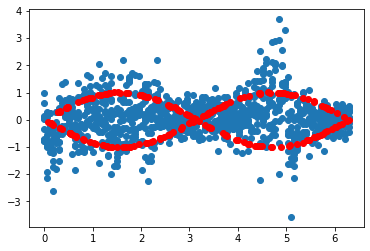

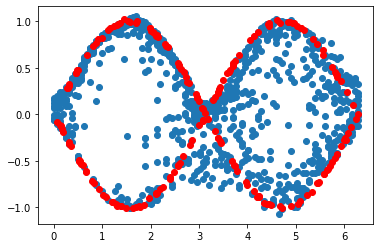

In [10]:
DEVICE = model.DEVICE
n_samples = 10

x, y = generate_data(std=0.01)

x_new = torch.linspace(0, 2*np.pi, 101).repeat(n_samples).reshape(-1, 1)
y_params = model.pred_param(x_new)
y_samples = model.pred_dist(x_new).sample(1)

# plt.errorbar(x_new, y_params[:, 0], yerr=np.exp(y_params[:, 1]), fmt='o')
plt.scatter(x_new, y_samples)
plt.scatter(x, y, c='red')
plt.show()

x_new = x_new.to(DEVICE)
y_params = torch.Tensor(y_params).to(DEVICE)
z = torch.randn(len(x_new), 1).to(DEVICE)
z = (z + y_params[:, 0].reshape(-1, 1)) * y_params[:, 1].exp().reshape(-1, 1)

y_new = model.flow(x=z, context=x_new, reverse=True)
y_new = y_new.detach().cpu().numpy()

plt.scatter(x_new.detach().cpu().numpy(), y_new)
plt.scatter(x, y, c='red')
plt.show()